In [22]:
from skimage.io import imshow, imread, imsave
import os
# import imageio
from imgaug import augmenters as iaa
from tqdm import tqdm

Reference Links:
* https://www.kaggle.com/parulpandey/overview-of-popular-image-augmentation-packages#3.-Data-Augmentation-using-imgaug



# Experiments

In [23]:
# useimageio library to read the image (alternatively you can use OpenCV cv2.imread() function)
image = imread('./backgrounds/0d53af869fe2a96f61c071c771dd2d3b.jpeg')

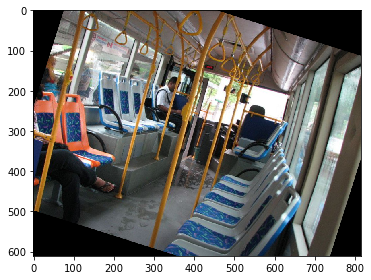

In [59]:
rotate = iaa.Affine(rotate=(-25, 25)) # rotate image

# augment image
image_rotated = rotate.augment_images([image])[0]
imshow(image_rotated)

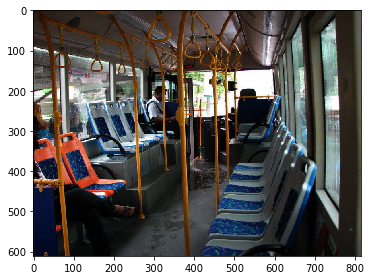

In [20]:
contrast2=iaa.GammaContrast(gamma=(0.4,2))
darkened_image = contrast2.augment_image(image)
imshow(darkened_image)

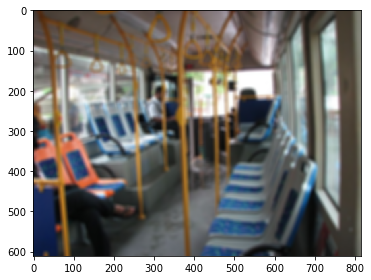

In [27]:
gb = iaa.GaussianBlur(sigma=5.0)
imshow(gb.augment_image(image))

# Main Pipeline

In [24]:
aug_pipeline = iaa.Sequential([
    iaa.Crop(percent=(0.05,0.2)),
    iaa.GaussianBlur(sigma=(2, 4.0)),
    iaa.GammaContrast(gamma=(0.7,2)),
    iaa.SomeOf((2,4),[
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.Crop(percent=(0, 0.2)),
        iaa.Sometimes(0.5, iaa.Affine(rotate=10)),
        iaa.Sometimes( 0.5,iaa.GaussianBlur(sigma=(0, 0.5))),
#         iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    ]),
    iaa.CenterCropToAspectRatio(aspect_ratio=1.5),
    iaa.Resize({"height": 200, "width": 300})
], 
# random_order=True # apply the augmentations in random order
)

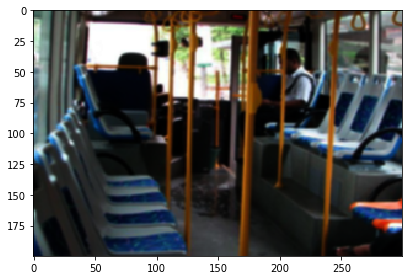

In [25]:
aug_img = aug_pipeline.augment_image(image)
imsave('backgrounds_augmented/0d53af869fe2a96f61c071c771dd2d3b.png', aug_img)
imshow(aug_img)

In [56]:
image.shape

(611, 815, 3)

In [26]:
foldername = "./backgrounds/"
for filename in tqdm(os.listdir(foldername)):
    try:
        image = imread(foldername+filename)
        for i in range(5):
    #         print(foldername + ".".join(filename.split(".")[:-1]+["png"]))
            aug_img = aug_pipeline.augment_image(image)
            imsave("./backgrounds_augmented/" + "".join(filename.split(".")[:-1]+["_"+str(i),".png"]), aug_img)
        del image, aug_img
#         imshow(aug_img)
    except ValueError:
        print(f"Read failed for image: {filename}")

  7%|▋         | 6/82 [00:03<00:47,  1.59it/s]

Read failed for image: .DS_Store


100%|██████████| 82/82 [01:01<00:00,  1.34it/s]


In [27]:
print("We have "+ str(len(os.listdir("./backgrounds_augmented/"))) +" augmented background images")

We have 402 augmented background images
